<a href="https://colab.research.google.com/github/salama4ai/Paxera_image_segmentation_project/blob/main/Ahmed_Salama_AI_Candidate_Test_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Candidate Segmentation Test

## Problem Description
Welcome to the AI Candidate Segmentation Test! In this task, you will be working on a segmentation problem using the U-Net architecture. Your goal is to segment objects of interest in images.

You have two options for the segmentation task:

### 1. Binary Segmentation
Binary segmentation task involves segmenting one specific class of objects in the images. The objective is to label pixels as either belonging to the object class of interest or not.

### 2. Multi-Class Segmentation
Multi-class segmentation task involves segmenting multiple classes of objects in the images. The dataset contains masks for each object class, and the goal is to assign each pixel to the corresponding class.



https://www.kaggle.com/datasets/aithammadiabdellatif/binarysegmentation-endovis-17?select=BinarySegmentation


---
## 1.Data Exploration and Preprocessing
To preprocess the data, follow these steps:
1. Load the dataset and explore it
2. Resize the images and masks to a fixed size.
3. Normalize the image data.
4. Apply data augmentation techniques to increase the dataset size (if needed). You can use libraries like Albumentations for augmentation.
5. Split The data to train and test
---


# `i would select Binary Segmentation for single class not Multi-Class Segmentation`

#### Load the dataset and explore it

In [1]:
#! pip install -q kaggle --upgrade
#from google.colab import files
#files.upload()
## Choose the kaggle.json file that you downloaded
#! mkdir ~/.kaggle
#! cp C:/Users/All/Downloads/kaggle.json ~/.kaggle/
## Make directory named kaggle and copy kaggle.json file there.
#! chmod 600 ~/.kaggle/kaggle.json
## Change the permissions of the file.
#! kaggle competitions download -c 'https://www.kaggle.com/datasets/aithammadiabdellatif/binarysegmentation-endovis-17/'
## unzip train data there
#! unzip train.zip -d train


In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'binarysegmentation-endovis-17:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1454365%2F2406172%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240828%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240828T145356Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D35b7b54d6bd85c2551026a1b6648640764b6af9749640563f1ef24ac2584108e4f5ecace26dbe8a47004a296916e0a9947560548d466b99520d8f5496df0eede47f4dbeb3326b1cce61d8f1574085402b2a9c784131e0eb6fd9701a5dd36a554dd37cc50f2a33706976a55082680db243be8292547441f2ad5095781a4e3244f3cd49426a936d467b7edf475e779837555723e0defb3011e74a5f78cb56bb97a3c757941aeefed3221633305a10927ac6083625ed018df5edd580a78babd99d911e42e05fa8e47a31d1b0ed6e5885587a734bcf11b383a6715114fa036da22bfc137d424bfd26a260538c245df62fb67179177f1c8f81870faae3d880e23e010'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1421567164 bytes downloaded
Downloaded and uncompressed: binarysegmentation-endovis-17
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import albumentations as A
#from skimage.io import imread, imshow
#from skimage.transform import resize
#from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, concatenate, Conv2DTranspose, Input
from tensorflow.keras.metrics import IoU, BinaryIoU
from tensorflow.keras.losses import Dice
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
# This function to be able to reproduce the same numbers in the future, by fixing
# the algorithms parameters that lead to generate the same random numbers

# printing pytorch version as this point may affect the reproducability if diffrent pytorch version used
print(f'using version {tf.__version__}')


# fix random number generation aka regenerate the same random numbers every time (such as weight and bias initialization )
def set_random_seed(SEED=7, deterministic=True):
    """Set random seed, for python, numpy, tensorflow

    This function to be able to reproduce the same numbers in the future, by fixing
    the algorithms parameters that lead to generate the same random numbers

    Args:
        seed (int): Seed to be used.
    """

    #
    os.environ['PYTHONHASHSEED']=str(SEED)
    # set seed for python random numbers.Set `python` pseudo-random generator at a fixed value
    #random.seed(SEED)
    # set seed for numpy random numbers. Set `numpy` pseudo-random generator at a fixed value
    #np.random.seed(SEED)

    # Set the seed using keras.utils.set_random_seed. This will set:
    # 1) `numpy` seed
    # 2) backend random seed
    # 3) `python` random seed
    tf.keras.utils.set_random_seed(SEED)

    #GLOBAL SEED:- set seed for tensorflow random numbers.  Set `tensorflow` pseudo-random generator at a fixed value
    tf.random.set_seed(SEED)
    # tf gpu fix seed, please `pip install tensorflow-determinism` first
    #os.environ['TF_DETERMINISTIC_OPS'] = '1' if deterministic else '0'
    #os.environ['TF_CUDNN_DETERMINISTIC'] = '1' if deterministic else '0'

    # # if if speed is less important than reproducibility then un-comment this line, as it will reduce the calculations-speed significantly but will leads to more robust reproducibility
    #tf.config.experimental.enable_op_determinism()
    #tf.config.threading.set_inter_op_parallelism_threads(1)
    #tf.config.threading.set_intra_op_parallelism_threads(1)

SEED=7
set_random_seed(SEED=SEED)

using version 2.17.0


In [6]:
%cd /kaggle/input/binarysegmentation-endovis-17
!dir

/kaggle/input/binarysegmentation-endovis-17
BinarySegmentation  PartsSegmentation  TypeSegmentation


In [7]:
%cd /kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/images
%cd /kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/binary_masks

%cd /kaggle/input/binarysegmentation-endovis-17/PartsSegmentation/images
%cd /kaggle/input/binarysegmentation-endovis-17/PartsSegmentation/masks

%cd /kaggle/input/binarysegmentation-endovis-17/TypeSegmentation/images
%cd /kaggle/input/binarysegmentation-endovis-17/TypeSegmentation/masks


/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/images
/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/binary_masks
/kaggle/input/binarysegmentation-endovis-17/PartsSegmentation/images
/kaggle/input/binarysegmentation-endovis-17/PartsSegmentation/masks
/kaggle/input/binarysegmentation-endovis-17/TypeSegmentation/images
/kaggle/input/binarysegmentation-endovis-17/TypeSegmentation/masks


In [8]:
def display_images(display_list):
    plt.figure(figsize=(15, 15))
    imgs_count = len(display_list)
    for i in range(imgs_count):
        plt.subplot(1, imgs_count, i+1)
        img = load_img(display_list[i]) if not isinstance(display_list[i], np.ndarray) else display_list[i]
        plt.imshow(array_to_img(img))
        plt.axis('off')
    plt.show()

### TypeSegmentation images

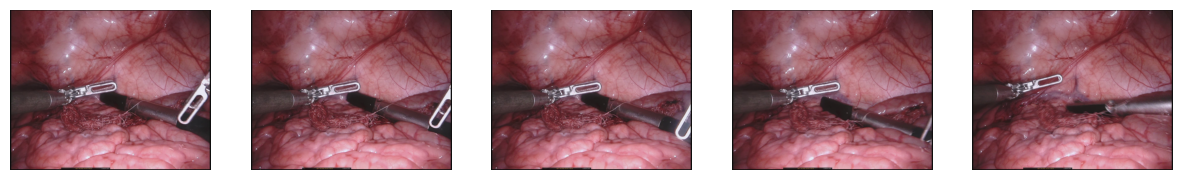

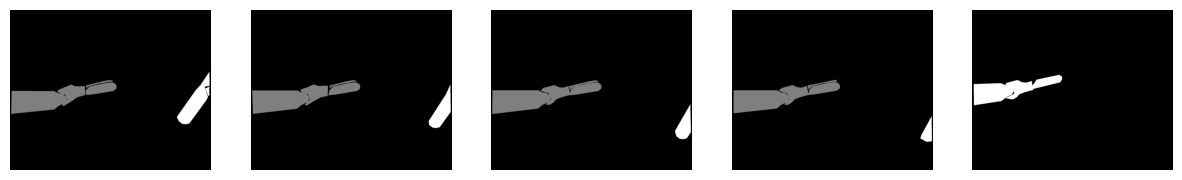

In [9]:
imgs_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/TypeSegmentation/images/*"))
masks_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/TypeSegmentation/masks/*"))
display_images(display_list=imgs_names_list[0:5])
display_images(display_list=masks_names_list[0:5])
imgs_names_list=None
masks_names_list=None

### PartsSegmentation images

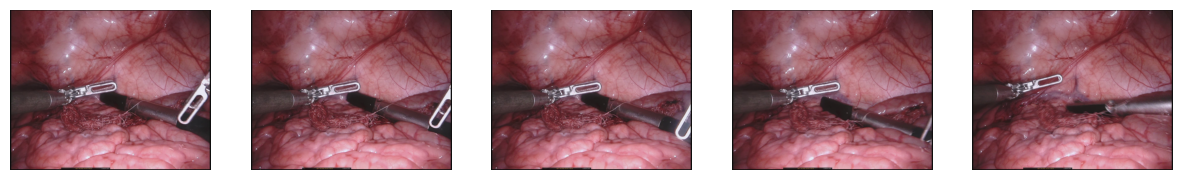

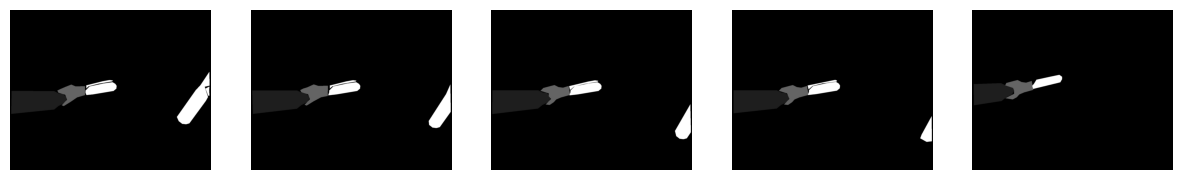

In [10]:
imgs_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/PartsSegmentation/images/*"))
masks_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/PartsSegmentation/masks/*"))
display_images(display_list=imgs_names_list[0:5])
display_images(display_list=masks_names_list[0:5])
imgs_names_list=None
masks_names_list=None

BinarySegmentation images

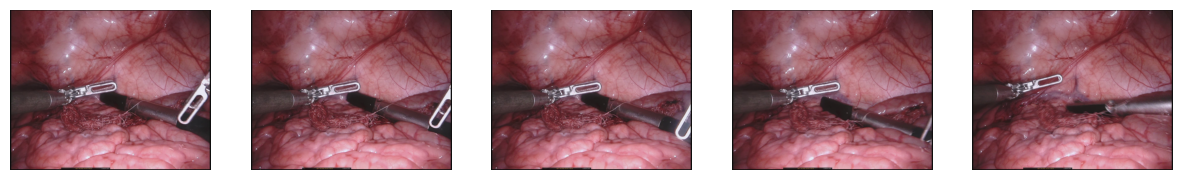

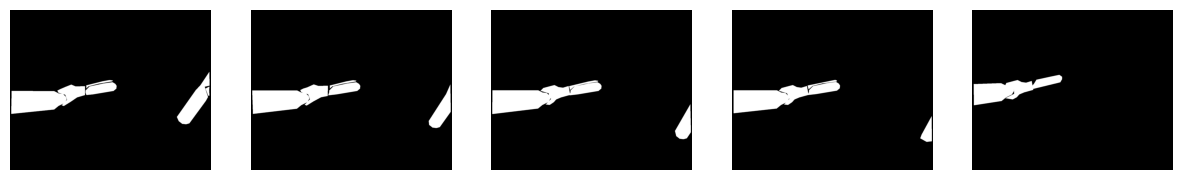

In [11]:
imgs_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/images/*"))
masks_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/binary_masks/*"))
display_images(display_list=imgs_names_list[0:5])
display_images(display_list=masks_names_list[0:5])

the figures above shows that only the binarysegmentation folder contains data for binary segmentation not for Multi-Class Segmentation, thus i would only use this folder images and masks

In [12]:
imgs_names_list_png = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/images/*.png"))
imgs_names_list_jpg = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/images/*.jpg"))
imgs_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/images/*"))

print(f'images png_pictures count = {len(imgs_names_list_png)}')
print(f'masks jpg_pictures count = {len(imgs_names_list_jpg)}')
print(f'images all pictures count = {len(imgs_names_list)}')
imgs_names_list_jpg=None
imgs_names_list_png=None

images png_pictures count = 300
masks jpg_pictures count = 225
images all pictures count = 525


In [13]:
masks_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/binary_masks/*"))
print(f'masks pictures count = {len(masks_names_list)}')

masks pictures count = 525


#### loading and exploring the dataset

In [14]:

def show_data(data_list):
    # load the image
    img = load_img(data_list[0])
    #from PIL import Image
    #img = Image.open(imgs_names) #under the hood the previous line is the same as this line.

    # details about the image printed below
    print(type(img))
    print(img.format)
    print(img.mode)
    print(img.size)

    # convert the given image into  numpy array
    img_numpy_array = img_to_array(img)
    print("Image is converted and NumPy array information :")
    # print the type of converted image
    print(type(img_numpy_array))
    print("type:", img_numpy_array.dtype)
    print("shape:", img_numpy_array.shape)
    max(img_numpy_array.flatten())
show_data(data_list=imgs_names_list)

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(1280, 1024)
Image is converted and NumPy array information :
<class 'numpy.ndarray'>
type: float32
shape: (1024, 1280, 3)


In [15]:
show_data(data_list=masks_names_list)

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(1280, 1024)
Image is converted and NumPy array information :
<class 'numpy.ndarray'>
type: float32
shape: (1024, 1280, 3)


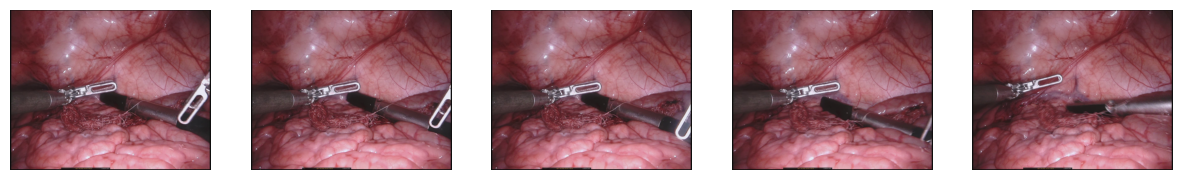

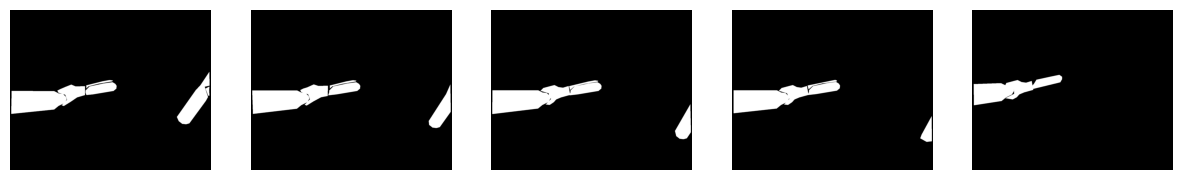

In [16]:
display_images(display_list=imgs_names_list[0:5])
display_images(display_list=masks_names_list[0:5])

#### Resizing and normalizing

In [17]:
# defining some variables
IMG_HEIGHT = 256; IMG_WIDTH = 256; IMG_CHANNELS = 3
masks_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/binary_masks/*"))
imgs_names_list = sorted(glob("/kaggle/input/binarysegmentation-endovis-17/BinarySegmentation/images/*"))

def resize(pic_arr, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    """resize the images and masks"""
    resized_pic = tf.image.resize(pic_arr, target_size)
    # this can be done by the following line
    #resized_pic = skimage.transform.resize(pic_arr, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    return resized_pic

def normalize(unnormalized_pic):
    # Normalize the pixel range values between [0:1]
    normalized_pic = tf.cast(unnormalized_pic, dtype=tf.float32)/255.0

    # we may instead use MinMaxScaler
    #scaler = sklearn.preprocessing.MinMaxScaler()
    #scaler.fit(unnormalized_pic)
    #return scaler.transform(unnormalized_pic)

    #or we also could use
    #scaler = sklearn.preprocessing.StandardScaler()
    #scaler.fit(unnormalized_pic)
    #return scaler.transform(unnormalized_pic)

    return normalized_pic

def load_image(pic_name, color_mode):
    """ Load single picture (no-matter an image or a mask)"""

    # load the image
    pic = load_img(pic_name, color_mode)
    # convert the given image into  numpy array
    pic_arr = img_to_array(pic)
    return pic_arr

def preprocess_single_pic(pic_name, color_mode="rgb"):
    """preprocess pictures, namely: load, resize and normalize pics"""

    pic_arr = load_image(pic_name, color_mode)
    resized_pic = resize(pic_arr)
    preprocessed_pic = normalize(resized_pic)
    return preprocessed_pic

def augment_data(images_list, masks_list, aug_times=1):
    """augment the data"""

    transform = (A.ReplayCompose([A.HorizontalFlip(p=1)]),
                 A.ReplayCompose([A.VerticalFlip(p=1)]))

    images_augmentation = np.array([trans(image=img)["image"] for img in images_list for trans in transform for _ in range(aug_times)])
    masks_augmentation = np.array([trans(image=msk)["image"] for msk in masks_list for trans in transform for _ in range(aug_times)])
    return images_augmentation, masks_augmentation

def split_data(imgs_names_list, masks_names_list, split=0.11):
    """split the data to train and test"""

    # Split the data
    train_imgs_names, test_imgs_names, train_masks_names, test_masks_names = train_test_split(
        imgs_names_list, masks_names_list, test_size=split, random_state=SEED, shuffle=True)
    print(f'train samples count = {len(train_imgs_names)} imgs, {len(train_masks_names)} masks')
    print(f'test samples count = {len(test_imgs_names)} imgs, {len(test_masks_names)} masks')
    return train_imgs_names, test_imgs_names, train_masks_names, test_masks_names

def preprocess_data(unprocessed_data, color_mode):
    """preprocess the whole data"""

    len_data = len(unprocessed_data)
    data_preprocessed = np.array([preprocess_single_pic(item, color_mode) for item in tqdm(unprocessed_data, total=len_data)],
                                 dtype=(np.uint8 if color_mode=="grayscale" else np.float32))

    return data_preprocessed


def split_validation_data(xtrain_unaugmented, ytrain_unaugmented, validation_percent=0.0):
    """split the train data to train and validation"""

    val_samples_count = int(validation_percent*len(xtrain_unaugmented[0]))
    print(f'val_samples_count = {val_samples_count}')
    xval, yval = xtrain_unaugmented[:val_samples_count], ytrain_unaugmented[:val_samples_count]
    xtrain_unaugmented, ytrain_unaugmented = xtrain_unaugmented[val_samples_count:], ytrain_unaugmented[val_samples_count:]
    return xval, yval, xtrain_unaugmented, ytrain_unaugmented

def prepare_train_data():
    """prepare the train data"""
    xtrain_unaugmented = preprocess_data(train_imgs_names, "rgb")
    ytrain_unaugmented = preprocess_data(train_masks_names, "grayscale")
    print("\n")
    print(f'xtrain_unaugmented shape = {xtrain_unaugmented.shape}')
    print(f'ytrain_unaugmented shape = {ytrain_unaugmented.shape}')

    xval, yval, xtrain_unaugmented, ytrain_unaugmented = split_validation_data(
        xtrain_unaugmented, ytrain_unaugmented)

    xtrain_augmentation, ytrain_augmentation = augment_data(xtrain_unaugmented, ytrain_unaugmented)
    print("\n")
    print(f'xtrain_augmentation shape = {xtrain_augmentation.shape}')
    print(f'ytrain_augmentation shape = {ytrain_augmentation.shape}')
    xtrain = np.concatenate((xtrain_unaugmented, xtrain_augmentation))
    ytrain = np.concatenate((ytrain_unaugmented, ytrain_augmentation))
    print("\n")
    print(f'xtrain shape = {xtrain.shape}')
    print(f'ytrain shape = {ytrain.shape}')
    display_images(xtrain_augmentation[0:11])
    display_images(ytrain_augmentation[0:11])
    return xtrain, ytrain, xval, yval

train_imgs_names, test_imgs_names, train_masks_names, test_masks_names = split_data(imgs_names_list, masks_names_list)
imgs_names_list, masks_names_list = None, None

train samples count = 467 imgs, 467 masks
test samples count = 58 imgs, 58 masks


100%|██████████| 467/467 [00:09<00:00, 50.24it/s]




xtrain_unaugmented shape = (467, 256, 256, 3)
ytrain_unaugmented shape = (467, 256, 256, 1)
val_samples_count = 0


xtrain_augmentation shape = (934, 256, 256, 3)
ytrain_augmentation shape = (934, 256, 256, 1)


xtrain shape = (1401, 256, 256, 3)
ytrain shape = (1401, 256, 256, 1)


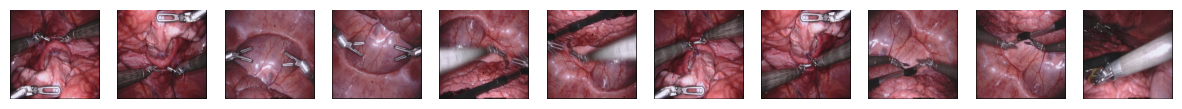

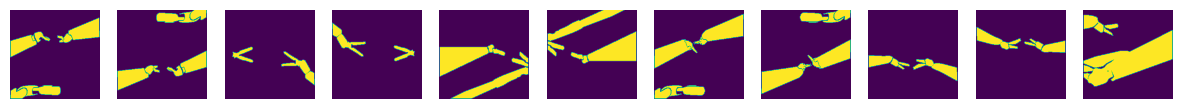

In [18]:
xtrain, ytrain, xval, yval = prepare_train_data()
train_imgs_names, train_masks_names = None, None

___
## 2.U-Net Architecture
You have two options for implementing the U-Net architecture to choose from :<br>
- Build the U-Net from scratch.<br>
- Use a pre-built implementation from TensorFlow , PyTorch or any python packges that provide the model.<br>
---

###2.1 Building U-Net Model <specify the implementaion  option here>
Your code implementation for the U-Net architecture should go here.


## Build the U-Net Binary segmentation from scratch


In [19]:
# Build the U-Net Binary segmentation from scratch

def encoder_unit(inpt, pooling=True):
    """contraction unit building block """

    fltrs_count = 32 if inpt.shape[3] == 3 else (inpt.shape[3])*2
    c = Conv2D(fltrs_count, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inpt)
    c = Dropout(0.1)(c)
    c = Conv2D(fltrs_count, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c)
    output = (MaxPooling2D((2, 2))(c)) if pooling else c
    return c, output

def decoder_unit(prev_unit, opposite_unit, dropout=0.1):
    """expansion unit building block"""

    conv_dim  = prev_unit.shape[3]//2
    u = Conv2DTranspose(conv_dim, (2, 2), strides=(2, 2), padding='same')(prev_unit)
    u = concatenate([u, opposite_unit])
    c = Conv2D(conv_dim, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u)
    c = Dropout(dropout)(c)
    c = Conv2D(conv_dim, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c)
    return c

# contraction path
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#preprocessed_input = tf.keras.layers.Lambda(lambda x: preprocess_data(x, "rgb"))(inputs)
c1, output1 = encoder_unit(inpt=inputs) #, fltrs_count=16
c2, output2 = encoder_unit(inpt=output1) #, fltrs_count=32
c3, output3 = encoder_unit(inpt=output2) #, fltrs_count=64
c4, output4 = encoder_unit(inpt=output3) #, fltrs_count=128
c5, output5 = encoder_unit(inpt=output4, pooling=False) #, fltrs_count=256

# expansion path
c6 = decoder_unit(prev_unit=output5, opposite_unit=c4, dropout=0.1)
c7 = decoder_unit(prev_unit=c6, opposite_unit=c3, dropout=0.1)
c8 = decoder_unit(prev_unit=c7, opposite_unit=c2, dropout=0.1)
c9 = decoder_unit(prev_unit=c8, opposite_unit=c1, dropout=0.1)
outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

### 2.2 Compile the model with an appropriate loss function and optimizer.

In [20]:
#To Do

In [21]:
#Jaccard index
iou = BinaryIoU(target_class_ids=[0, 1], threshold=0.5)

#Dice coefficient loss
dice = Dice(reduction='sum_over_batch_size', name='dice')

unet_model = Model(inputs=[inputs], outputs=[outputs], name='U-Net')
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', iou, dice])
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 32)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 32)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 64)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 128)    │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 256)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 256)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 7,760,097 (29.60 MB)

 Trainable params: 7,760,097 (29.60 MB)

 Non-trainable params: 0 (0.00 B)

---
## 3.Model Training
To train the U-Net model, do the following:
1. Set hyperparameters like the number of epochs and batch size.
2. Monitor the training progress (e.g., print loss values , use callbacks or plot the acc vs loss graphs ).
3. Save the best wieghtto use  in the evaluation part
---

In [22]:
# model check point
checkpoint_path = "/kaggle/input/binarysegmentation-endovis-17/model"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_filepath = f"{checkpoint_dir}/modelCheckpoints-epoch:02d-val_loss:.2f.keras"
cp_callbacks = [ModelCheckpoint(filepath=checkpoint_filepath, verbose=1, save_best_only=True),
                EarlyStopping(monitor='accuracy', patience=65, verbose=1, mode='auto',
                              restore_best_weights=True),
                TensorBoard(log_dir='./logs'),
                ReduceLROnPlateau(monitor='accuracy', factor=0.01, patience=15,
                                  verbose=1, mode='auto')]
BATCH_SIZE = 2
EPOCKS = 75

unet_model.fit(xtrain, ytrain, epochs=EPOCKS, callbacks=cp_callbacks, verbose=1,
               shuffle=True, batch_size=BATCH_SIZE, validation_data=(xval, yval) if len(xval)>0 else None)
xtrain, ytrain, xval, yval = None, None, None, None

Epoch 1/75
701/701 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step - accuracy: 0.9181 - binary_io_u: 0.6813 - dice: 0.4289 - loss: 0.2108 - learning_rate: 0.0010
Epoch 2/75


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.9654 - binary_io_u: 0.8496 - dice: 0.1968 - loss: 0.0876 - learning_rate: 0.0010
Epoch 3/75
701/701 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9719 - binary_io_u: 0.8755 - dice: 0.1613 - loss: 0.0701 - learning_rate: 0.0010
Epoch 4/75
701/701 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9667 - binary_io_u: 0.8555 - dice: 0.1908 - loss: 0.0847 - learning_rate: 0.0010
Epoch 5/75
701/701 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9758 - binary_io_u: 0.8910 - dice: 0.1391 - loss: 0.0596 - learning_rate: 0.0010
Epoch 6/75
701/701 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.9778 - binary_io_u: 0.8991 - dice: 0.1284 - loss: 0.0549 - learning_rate: 0.0010
Epoch 7/75
701/701 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.9788 - binary_io_u: 0.9029 - dice: 0.1233 - loss: 0.0534 - learning_rate: 0.0010
Epoch 8/75
701/701 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9811 - binary_io_u: 0.9130 - dice: 0.1090 - loss:

---
## 4.Model Evaluation
Evaluate the trained model on a separate test dataset using the following steps:
1. Calculate relevant metrics such as Dice coefficient or IoU.
2. Visualize the segmentation results .
---

In [23]:
#preparing the test data
xtest = preprocess_data(test_imgs_names, "rgb")
ytest = preprocess_data(test_masks_names, "grayscale")
ypredicted = unet_model.predict(xtest, verbose=1)
ypredicted = (ypredicted > 0.5).astype(np.uint8)
ypredicted.shape

100%|██████████| 58/58 [00:00<00:00, 63.76it/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 17s/step


(58, 256, 256, 1)

In [24]:
iou_ = iou(ytest, ypredicted)
dice_ = dice(ytest, ypredicted)
print(f'iou = {iou_.numpy()}')
print(f'dice = {dice_.numpy()}')

iou = 0.950076699256897
dice = 0.04929852485656738


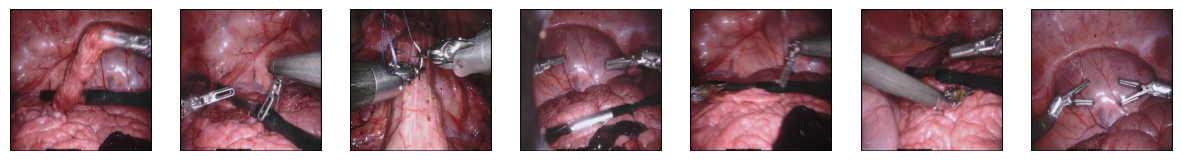

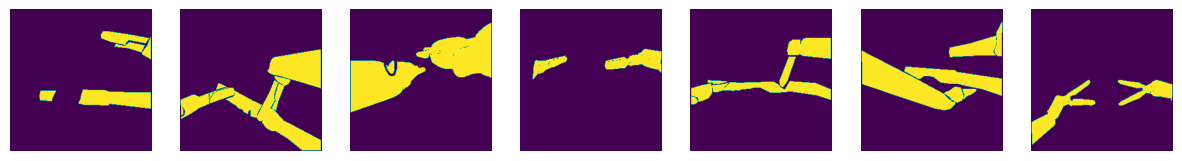

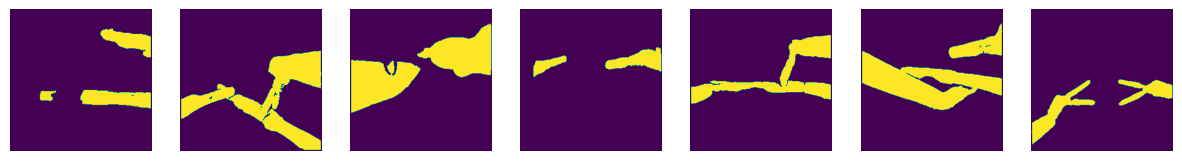

In [25]:
#Visualize the segmentation results .
display_images(display_list=xtest[0:7]) # xtest
display_images(display_list=ytest[0:7]) #ytest
display_images(display_list=ypredicted[0:7]) #ypredict